# Upscaling Fine Scale Porous Media Grids for Porous Flow Simulation

<table>
<tr>   
<td><figure>
    <img align="left" src="img/StreamlineF.png" width="350"/>
    <figcaption>Fine scale streamlines and permeability in X direction</figcaption>
    </figure>
    </td>
<td><figure>    
    <img align="left" src="img/StreamlineHarm.png" width="350" />
    <figcaption>Coarse scale streamlines and permeability in X direction</figcaption>
    </figure>
    </td>
</tr></table> 
<br>
<table>

<details>
    <summary><p><font size="4" color="navy"><i> Click here to Show/Hide Introduction and Outline</i></font></p></summary>    
    <td><tr>
    <p style="text-align:center;"> <font size="4" color="black"><b>This notebook introduces:</b>
        <ul><li>Corner Point Grids (CPG)</li>
            <li>Permeability tensors and Single Phase Flow in Porous Media</li>
            <li>Upscaling of Single Phase Porous Flow Parameters: Porosity and Permeability</li>
        </ul> <b>The workflow allows you to:</b></font></p>
       <ol style="line-height:2;"><font size="4" color="navy">
            <li><p style="text-align:left;"><a href='#1.-Create-a-Geomodel-discretized-by-a-GRDECL-Pillar-Grid' style="text-decoration:none"> Create a Geomodel discretized by a GRDECL Pillar Grid</a></p></li>
            <li><p style="text-align:left;"><a href='#2.-Generate-Porosity-and-Permeability-Fields-and-Compute-Single-Phase-Flow' 
                            style="text-decoration:none"> Generate Porosity and Permeability Fields and Compute Single Phase Flow</a></p></li>
            <li><p style="text-align:left;"><a href='#3.-Construct-a-Coarse-Grid' 
                            style="text-decoration:none"> Construct a Coarse Grid</a></p></li>
            <li><p style="text-align:left;"><a href='#4.-Upscale-Permeability' 
                            style="text-decoration:none"> Upscale Permeability</a></p>
           <ul> <font size="3">
           <li><p style="text-align:left;"><a href='#&#149;-Power-Averaging-Methods' 
                            style="text-decoration:none"> Power Averaging Methods</a></p></li>
           <li><p style="text-align:left;"><a href='#&#149;-Flow-Based-Methods'
                            style="text-decoration:none">Flow Based Methods</a></p></li>
               </font></ul></li>
       </font></ol>
        </tr></td>
</table>
</details>

<p><font size="2" color="grey">
  Jupyter notebook Hints: &nbsp &nbsp &nbsp &nbsp To run a cell press [SHIFT + ENTER]. &nbsp &nbsp &nbsp &nbsp To toggle its output press [0] </font>
</p>   

## 1. Create a Geomodel discretized by a GRDECL Pillar Grid

<details>
<summary><p><font size="4" color="navy"> Click here to Show/Hide Information about Corner Point Grids (CPG)</font></p></summary>
<table><tr> 
        <td><img align="left"  src="img/corner_point_grid.png" width="350" /> <figcaption>Figure 1</figcaption></td>  
        <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Corner Point Grids (CPG):</b><br>
                CPG can be seen as Modified Cartesian Grids with modifications allowing to obtain more flexible and Less Structured Grids. 
        		They are made of hexaedra set on vertical Pillars (<font color="red">red lines</font> in Figure 1) where:
        		<ul>
           			<li><p style="text-align:left;">Each Pillar corresponds to a node of an inital 2D Planar Grid ({ [I, J], I $\in$ {0,2} , J $\in$ {0,1} } in Figure 1) </p></li>
                    <li><p style="text-align:left;">Each Hexaedron  [I,J,K] is set on its 4 surrounding pillars { [I+i, J+j], i,j $\in$ {0,1} }</p></li>
               		<li><p style="text-align:left;">The 8 corners of an hexaedron can slide independently on its 4  pillars</p></li>                    
               	</ul>
               <p style="text-align:left;"><b> Vertical sliding allows to introduce faulting and non orthogonal shapes in CPG  </b></p></font>
        </p></td>
</tr></table>
<p><font size="3" color="navy"><b>This section provides instructions to Create/Visualize a CPG. <br> Four examples are detailed in the figure below (Figure 2). Similarly you can generate your own CPG by setting this parameters:</b></font></p>
<br> 
<img align="center" src="img/GRDECL_simplDisturbed3.png" width="1000"/><figcaption>Figure 2</figcaption>
<br>
 
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>

In [16]:
from GRDECL2VTK import *
from utils import *

# 1.1 Set physical dimensions in physDims (m)
physDims=[2000.,1000,500]

# 1.2 Set model grid dimensions in gridDims
Nx=20;  Ny=Nx;  Nz=Nx
gridDims=[Nx,Ny,Nz]

# 1.3 Set corner point grid options: Disturbed pillars, Flat Grid, Fault 
opt=buildCPGGrid_opt(\
disturbed=True,\
flat=False,\
fault_drop=1.*physDims[2]*0.25,\
fault_nx=Nx//2)

# 1.4 Create empty GeologyModel - Build CPG
Model=GeologyModel()
Model.buildCPGGrid(physDims,gridDims,opt)

# 1.5 Visualize Geometry and check initial parameters
Model.plot_scalar("PERMX",add_log_scale=True).show(show_edges=True)

# 1.6 Write GRDECL FILE (by default in Results/PILLAR_Grid.GRDECL) 
Model.write_simpleCPG_GRDECL()


     Creating Grid:
       Type: CornerPoint Grid
       Grid Dimensions (NX,NY,NZ): (20 x 20 x 20)
       Number Of Grid Cells: 8000
       Created: Fields: ***PERMX***PERMY***PERMZ***PORO***
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 64000
     NumOfCells 8000
     .....Done!
[Output] Writing "Results/PILLAR_Grid.vtu" Paraview file....
vtu file created !

[Output] Writing "Results/PILLAR_Grid.vtp" VTP file..vtp file created.
plotting file:Results/PILLAR_Grid.vtp


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

[Output] Writing "Results/PILLAR_Grid.GRDECL" SIMPLE GRDECL example file.. Writing PERMX
 Writing PERMY
 Writing PERMZ
 Writing PORO
 Writing PERMXLOG10
...done


## 2. Generate Porosity and Permeability Fields and Compute Single Phase Flow

<details>
    <summary><p><font size="4" color="navy"><i> Click here to Show/Hide Information about Permeability and Pressure computation</i></font></p></summary>
<table><tr> 
        <td><img align="left"  src="img/darcy" width="1000" /> <figcaption>Figure 1</figcaption></td>  
        <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Absolute Permeability $K$:</b><br>
                Permeability (H.Darcy, 1856) is the ability of a porous medium to conduct fluids in its interconnected pores. The absolute permeability controls fluid flow rates depending on considered directions. It is a second order tensor $\left(\overline{\overline K}\right)$with lognormal distributed components. In many practical situation it is assumed to be transversaly isotropic (horizontally isotropic):
            $\begin{pmatrix}K_H & 0 & 0\\0 & K_H & 0 \\ 0 & 0 & K_V\end{pmatrix} \quad (K_H>K_V)$
            </font></p></td>
</tr></table> 
<table><tr> 
        <td><img align="left"  src="img/TPFA_drops.png" width="750" /> <figcaption>Figure 2</figcaption></td>  
        <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Single Phase Flow Equation:</b><br>
            The pressure equation, for a steady single phase Darcy flow with incompressible fluid and rock  and no gravity, follows:

$\begin{equation}
\left\lbrace 
\begin{array}{ll}  
\vec{v} &=-\frac{K}{\mu} \nabla P \\ 
\nabla \ldotp \left(\rho \vec{v} \right) &=q 
\end{array}
\right. 
\label{eq:1}
\end{equation}$
<br>          
For our single phase upscaling tests we use its simplified version:

$\begin{equation}
\left\lbrace 
\begin{array}{cll}  
\nabla \ldotp \left(-K \nabla P \right) &=0 \qquad &in \: \Omega\\ 
P&=P_0  \qquad &in \:  \Gamma_{Dir}\\
K \nabla P\cdot n&=0 &in \:  \Gamma_{Neum}\\
\end{array}
\right.
\end{equation}$<br>
            This equation is solved numerically using a  Two Point Flux Approximation (TPFA) Solver (Pressure Solutions for faulted and non faulted configurations are shown in Figure2). 
            </font></p></td>
</tr></table>          
    <p><font size="4" color="navy">This section provides instructions to:
    <ol>
        <li>Generate and Visualize porosities and LogNormal permeabilities distributions (transversely isotropic) for:
        <ul><li>Horizontally Layered distributions</li>
            <li>Basculed Layered distributions</li>
            <li>A mix of Horizontal and Basculed Layered distributions</li></ul></li>
        <li>Compute and Visualize pressure  and flow streamlines (TPFA solver, K-orthogonal CPG)</li> 
    </ol></font>
<table>
    <td><img align="center" src="img/layered_basculed_K50.png" width="500"/></td>
    <td><img align="center" src="img/layered_basculed_PV50.png" width="600"/> </td>
</table>
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>    

[logNormLayers] Filling K and Phi Z layers with log normal distributions
[UpdateListCellData] varname:PORO
[UpdateListCellData] varname:PERMX
[UpdateListCellData] varname:PERMY
[UpdateListCellData] varname:PERMZ


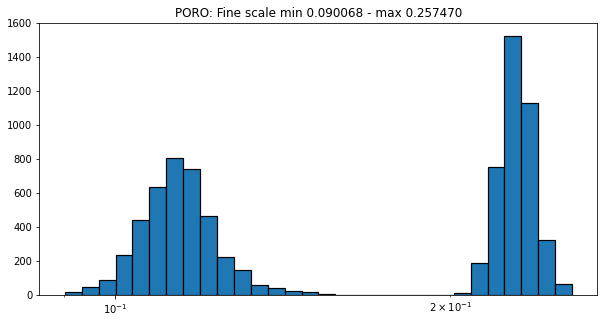

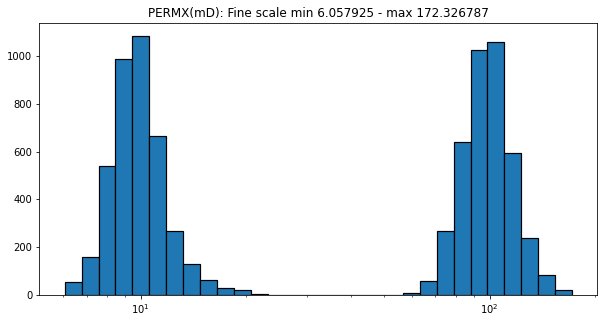

[Output] Writing "Results/PILLAR_Grid.GRDECL" SIMPLE GRDECL example file.. Writing PERMX
 Writing PERMY
 Writing PERMZ
 Writing PORO
 Writing PERMXLOG10
 Writing Pressure
...done
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 64000
     NumOfCells 8000
     .....Done!
[Output] Writing "Results/PILLAR_Grid.vtu" Paraview file....
vtu file created !

[Output] Writing "Results/PILLAR_Grid.vtp" VTP file..vtp file created.
plotting file:Results/PILLAR_Grid.vtp


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 64000
     NumOfCells 8000
     .....Done!
[Output] Writing "Results/PILLAR_Grid.vtu" Paraview file....
vtu file created !



ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [15]:
# 2.1 Set list of vertical permeability values
K_LayerPerm=[100,10]*2 # produces layers: [100,10,100,10] (mD)

# 2.2 Fill grid with permeability from the previous list 
# Choose one of the 3 possibilities
K,phi=logNormLayers(gridDims,K_LayerPerm,poro_const=0.05)
# K,phi=logNormLayers_basc(gridDims,K_LayerPerm,poro_const=0.05)
# K,phi=logNormLayers_mixed_basc_horiz(gridDims,K_LayerPerm,poro_const=0.05,Zcut_ratio=0.25)

# 2.3 Update porosity/permeability diagonal components with generated grid values
# We use transversaly isotropic values with K_V=K_H/100
Update_fields=["PORO","PERMX","PERMY","PERMZ"]
Update_values=[ phi  , K     , K     , 0.01*K ]
Model.UpdateListCellData(var_list=Update_fields,array_list=Update_values)

# 2.4 Visualize Fine scale histograms
for scalar in ["PORO","PERMX"]:
    Model.GRDECL_Data.Plot_hist(scalar,text="Fine scale")

# 2.5 Compute TPFA Pressure values
Model.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt)

# 2.5b Write GRDECL FILE (by default in Results/PILLAR_Grid.GRDECL) 
Model.write_simpleCPG_GRDECL()

# 2.6 Visualize P and V
Model.plot_scalar("PERMX",ITK=True).show()
pl=Model.plot_streamlines(notebook=True, scalar="PERMXLOG10").show()

##  3. Construct a Coarse Grid
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>

<details>
    <summary><p><font size="4" color="navy"><i> Click here to Show/Hide Information about Coarse Grid Generation for the Upscaling Tests</i></font></p></summary>
<table><tr> 
        <td><img align="left"  src="img/Partitioning.png" width="1500" /> <figcaption>Figure 1</figcaption></td>  
        <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Grid Coarsening:</b><br>
                We create a coarser grid by partitoning the initial grid. To do so we divide the initial grid in each direction. Each grid dimensions $N_X,\: N_Y,\: N_Z$ is divided by the scaling factors $r_x,\: r_y,\: r_z$. Depending on remainders it produces coarse cells of size  $r_x\times r_y \times r_z$ or smaller cells. We can observe in Figure 1 that the coarse cells which are not contiguous to the fault have size $5\times 11 \times 11$ and that near the fault the other coarse cells have size $6\times 11 \times 11$  avoiding size $1\times 11 \times 11$ coarse cells. 
            </font></p></td>
</tr></table>          
    <p><font size="4" color="navy">This section provides instructions to:
    <ol>
        <li>Set coarsening factors </li>
        <li>Create the Coarse Grid and upscale porosity (arithmetic averaging)</li>
        <li>Print the list of all the upscaling methods implemented  in this notebook"</li>
    </ol></font>
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>    

[Partioning] Partitoning from Fine grid of size: [20,20,20] to Coarse grid of size: [4,4,4]


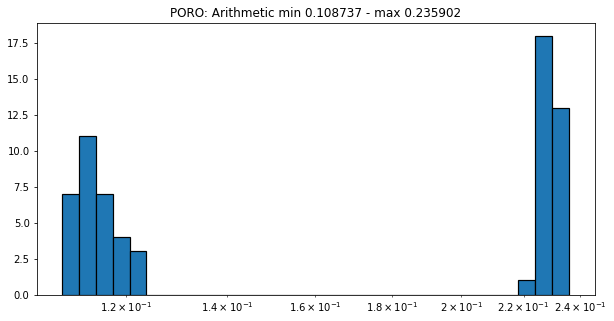

['Upscale_Arithmetic_mean', 'Upscale_Geometric_mean', 'Upscale_Harmonic_mean', 'Upscale_Harmx_mean', 'Upscale_Harmy_mean', 'Upscale_Harmz_mean', 'Upscale_Perm', 'Upscale_TPFA_glob', 'Upscale_TPFA_loc', 'Upscale_TPFA_loc_vol_average']


In [9]:
# 3.1 Set coarsening factor (grid dimensions of coarse cells)
Model.GRDECL_Data.coarse2fine_ratio=[5]*3

# 3.2 Create coarse grid and upscale porosity
Model2=Model.create_coarse_model()

# List of implemented upscaling methods
print(Model.Upscaler.list_upscale_methods())

##  4. Upscale Permeability

<details>
    <summary><p><font size="4" color="navy"><i> Click here to Show/Hide Information about Upscaling Methods</i></font></p></summary>
<table>
<tr>   
<td><figure>
    <img align="left" src="img/StreamlineF.png" width="250"/>
    <figcaption>Fine scale</figcaption>
    </figure>
    </td>
<td><figure>    
    <img align="left" src="img/StreamlineHarm.png" width="250" />
    <figcaption>Coarse scale</figcaption>
    </figure>
    </td>
</tr></table> 
<br>
<table>    
<table><tr> <td><p style="text-align:left;"><font size="3" color="navy">
            <b>What is the aim of Permeability Upscaling?</b><br>
               We consider the fine scale pressure equation:
$\begin{equation}
 \nabla \ldotp \left(-K(X_F)\nabla P_F \right) =0 
 \label{eq:fineScale}
\end{equation}$
 This equation is initially defined for $X_F$  the fine scale discrete  values of X.
 We also consider the coarse scale pressure equation:
$ \begin{equation}
\nabla \ldotp \left(-K^*(X_C)\nabla P_C \right) =0
\label{ex:coarseScale}
 \end{equation}$
 In which the fine scale permeability $K$ defined for $X_F$ fine scale grid values must be replaced by the $K^*$ coarse scale permeability defined at the coarse scale in order to recover at the coarser scale the same flow characteristics. <br>More precisely $-K^*(X_C)\nabla P_C$  must recover $-K(X_F)\nabla P_F $ values at the coarse scale.
</font></p></td>
</tr></table>          
    <p><font size="4" color="navy">This section allows to test two types of permeability upscaling strategies:
    <ol>
        <li>Power Averaging methods </li>
        <li>Flow Based methods</li>
    </ol></font>
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>    

### &#149; Power Averaging Methods
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>


<details>
    <summary><p><font size="4" color="navy"><i> Click here to Show/Hide Information about Power Averaging based Upscaling Methods</i></font></p></summary>    
<table><tr> <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Power Averaging Methods:</b><br>
Power averaging  techniques were introduced by Deutsch(1989). They give the simplest and fastest way to obtain coarse scale permeabilities.  Permeability is considered as a diagonal tensor and each of its components is averaged using the power averaging formula: <br>
$\begin{equation}
<K_i>_{w_i}=\left( \frac{1}{\left| V_C\right|} \int_{V_C } \left[  K_i\right]^{w_i }   dX   \right)^\frac{1}{w_i},\qquad i\in \left\lbrace 1,\:2,\:3 \right\rbrace
\end{equation}$<br>
where $i$ is the index of a permeability component, $V_C$ is the coarse cell bulk volume and $w_i$ a chosen power averaging exponent.<br> The power averaging exponent $w_i$ must lie between $-1$ and $1$ who correspond respectively to the harmonic and arithmetic averaging formula. These two averaging formula are the analytic upscaled permeability solutions of layered systems with parallel or orthogonal flow orientations (arithmetic for parallel flow and harmonic for orthogonal one). The limit case where exponent $w_i \to 0$   corresponds to the geometric averaging and its formula can be expressed as:<br>
$\begin{equation}
<K_i>_{0}=exp\left(\frac{1}{\left| V_C\right|}  \int_{V_C} log\left[  K_i\right]   dX   \right)
\label{eq:PowerAvg2}
\end{equation}$<br>
  We implemented 6 power averaging strategies: an arithmetic, a geometric, an harmonic method and 3 partially harmonic-arithmetic methods which are harmonic in one direction and arithmetic in the 2 others: harmx, harmy and harmz.    
</font></p></td>
</tr></table>          
    <p><font size="4" color="navy">This section allows to:
        <ol>
            <li> Test these strategies on each component of the Permeability tensor (transversaly isotropic here)</li>
             <li>Compute and Visualize pressure  and flow streamlines (TPFA solver, K-orthogonal CPG)</li> 
    </ol> </font>
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>    

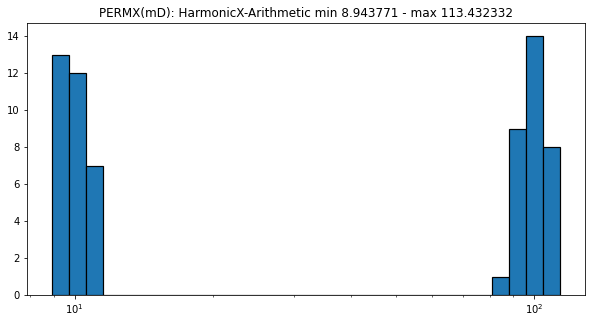

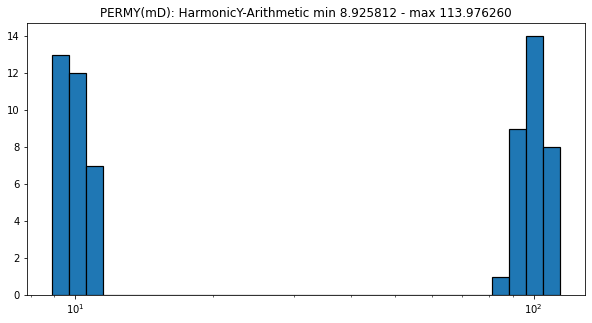

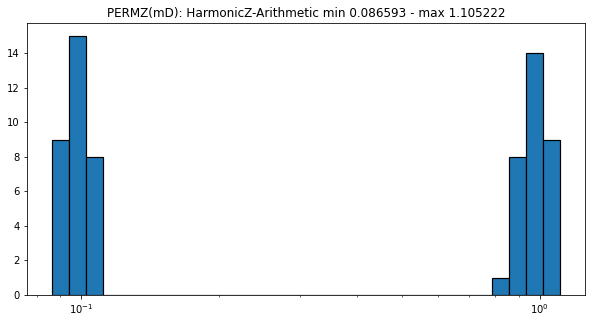

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 512
     NumOfCells 64
     .....Done!
[Output] Writing "Results\PILLAR_Grid_Coarse.vtu" Paraview file....Done!


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 512
     NumOfCells 64
     .....Done!
[Output] Writing "Results\PILLAR_Grid_Coarse.vtu" Paraview file....Done!


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [10]:
# 3.3 Set Power Averaging Upscaling methods
Model.Upscale_Perm(['Harmx_mean','Harmy_mean','Harmz_mean'])

# 3.3 Compute Pressure for coarse model
Model2.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt)
# # Model.two_plots_scalar("Pressure").show(False)
Model2.plot_scalar("PERMX",add_log_scale=True).show()

Model2.plot_streamlines(notebook=True, scalar="V").show()

### &#149; Flow Based Methods
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>

<details>
    <summary><p><font size="4" color="navy"> <i>Click here to Show/Hide Information about Flow Based Upscaling Methods</i></font></p></summary>
    
<table><tr><td><img align="left"  src="img/BC.png" width="2500" /> <figcaption>Figure 1</figcaption></td> 
           <td><p style="text-align:left;"><font size="3" color="navy">
            <b>Flow Based Methods:</b><br>
The first implemented flow based methods was introduced as a local flow upscaling method by Warren and Price in 1961. It consists in solving for each coarse cell three  times the single phase pressure equation with fixed pressure boundary conditions (BC) in one direction and no flow in the two others. Figure 1 shows the chosen boundary conditions. For one direction  we set a constant pressure gradient. The pressure is set at 1 (Pa) on the left boundary and at 0 at the right boundary (Dirichlet BC) and there is no flow through the other boundaries. 

</font></p></td></tr></table>         
    <p><font size="4" color="navy">This section allows to test 3 methods based on this local flow method:
        <ol>
            <li> A local flow method using the total flux through Dirichlet boundaries</li>
            <li>A local flow method using volume averaged pressure gradients and velocities on each coarse cell</li>
             <li>A global flow method using the total flux through coarse faces</li> </ol> 
            Furthermore for all the local methods:
            <ul><li>The coarse cells can be extended with fine layers around it</li>
                <li>The lateral boundary conitions can be set to constant linear pressure gradient</li>
            </ul>      
        </font></p>
    
<p style="text-align:right;"><a href='#Upscaling-Fine-Scale-Porous-Media-Grids-for-Porous-Flow-Simulation'>Go to the Table of contents</a></p>
</details>    

In [ ]:
# List of implemented upscaling methods
print(Model.Upscaler.list_upscale_methods())

In [ ]:
# 3.3 Flow Based Upscaling
Model.Upscaler.nlayer=0
Model.Upscaler.Lin_BC=True
Model.Upscale_Perm('TPFA_loc_vol_average')

# 3.3 Compute Pressure for coarse model
Model2.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt )
# # Model.two_plots_scalar("Pressure").show(False)
Model2.plot_scalar("Pressure").show()
Model.plot_streamlines(notebook=True, scalar="V").show()

In [ ]:
# 3.3 Upscaling
Model.Upscaler.nlayer=0
Model.Upscaler.Lin_BC=False
Model.Upscale_Perm('TPFA_glob')

# 3.3 Compute Pressure for coarse model
Model2.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt )
# # Model.two_plots_scalar("Pressure").show(False)
# Model2.plot_scalar("Pressure").show()
Model.plot_streamlines(notebook=True, scalar="V").show()

In [12]:
# List of implemented upscaling methods
print(Model.Upscaler.list_upscale_methods())

['Upscale_Arithmetic_mean', 'Upscale_Geometric_mean', 'Upscale_Harmonic_mean', 'Upscale_Harmx_mean', 'Upscale_Harmy_mean', 'Upscale_Harmz_mean', 'Upscale_Perm', 'Upscale_TPFA_glob', 'Upscale_TPFA_loc', 'Upscale_TPFA_loc_vol_average']


[UPSCALING TPFA loc volume average], nlayer: 0


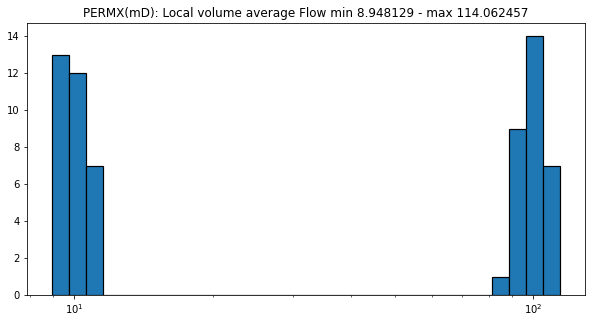

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 512
     NumOfCells 64
     .....Done!
[Output] Writing "Results\PILLAR_Grid_Coarse.vtu" Paraview file....Done!


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 64000
     NumOfCells 8000
     .....Done!
[Output] Writing "Results\PILLAR_Grid.vtu" Paraview file....Done!


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [14]:
# 3.3 Flow Based Upscaling
Model.Upscaler.nlayer=0
Model.Upscaler.Lin_BC=True
Model.Upscale_Perm('TPFA_loc_vol_average')

# 3.3 Compute Pressure for coarse model
Model2.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt )
# # Model.two_plots_scalar("Pressure").show(False)
Model2.plot_scalar("Pressure").show()
Model.plot_streamlines(notebook=True, scalar="V").show()

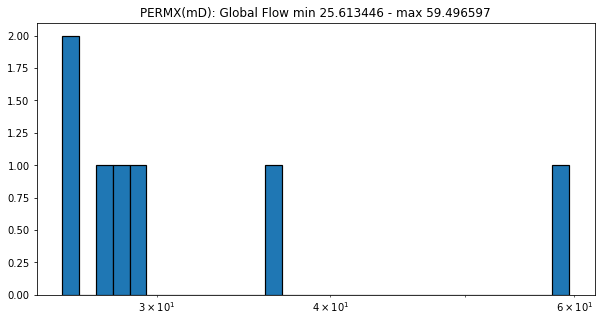

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 8000
     NumOfCells 1000
     .....Done!
[Output] Writing "Results\PILLAR_Grid.vtu" Paraview file....Done!


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [9]:
# 3.3 Upscaling
Model.Upscaler.nlayer=0
Model.Upscaler.Lin_BC=False
Model.Upscale_Perm('TPFA_glob')

# 3.3 Compute Pressure for coarse model
Model2.compute_TPFA_Pressure(Press_inj=1,direction="ijk",Fault_opt=opt )
# # Model.two_plots_scalar("Pressure").show(False)
# Model2.plot_scalar("Pressure").show()
Model.plot_streamlines(notebook=True, scalar="V").show()